# CPMpy Quick Start | Sudoku Example

Source: https://github.com/CPMpy/cpmpy/blob/master/examples/quickstart_sudoku.ipynb

## Goal
Your goal is to make sure that you can successfully run (and understand the basics of) this quick-start notebook. You can do that either locally or by uploading it to Google Colab and running it there. If you succeed, you will be ready to start on the real exercises in the other notebooks.


## Installation of a notebook environment

### Google Colab

This requires no installation, but it requires a Google account.

* Step 1: Go to https://colab.research.google.com
* Step 2: Sign In
* Step 3: Go to File → Upload notebook
* Step 4: Click the Upload option
* Step 5: Browse your machine for the notebook that you just downloaded


### Locally on your machine

Doing this once will empower you for many other projects to come.

Make sure *python* and *jupyter* are installed; you can use the installer of miniconda for example: https://www.anaconda.com/docs/getting-started/miniconda/install

Once installed, go to the directory containing this file and run the following command in a terminal:
```bash
jupyter notebook
```

After you've opened the file and can read this message, the rest is the same as when using from Google Colab.

## Installation of required Python packages

(You can ignore google* and tensor* dependency errors on Google Colab.)

In [1]:
!pip install cpmpy pandas matplotlib seaborn

## Loading the libraries

In [9]:
# load the libraries
import numpy as np
import cpmpy as cp

## A sudoku puzzle

Sudoku is a logic-based number puzzle, played on a partially filled 9x9 grid. The goal is to find the unique solution by filling in the empty grid cells with numbers from 1 to 9 in such a way that each row, each column and each of the nine 3x3 subgrids contain all the numbers from 1 to 9 once and only once.

We now define an example 9x9 puzzle, with some grid cells given and some empty:

In [10]:
e = 0 # value for empty cells
given = np.array([
    [e, e, e,  2, e, 5,  e, e, e],
    [e, 9, e,  e, e, e,  7, 3, e],
    [e, e, 2,  e, e, 9,  e, 6, e],

    [2, e, e,  e, e, e,  4, e, 9],
    [e, e, e,  e, 7, e,  e, e, e],
    [6, e, 9,  e, e, e,  e, e, 1],

    [e, 8, e,  4, e, e,  1, e, e],
    [e, 6, 3,  e, e, e,  e, 8, e],
    [e, e, e,  6, e, 8,  e, e, e]])

Note how we use `e` to represent the empty cells, where `e` is a standard python variable that we gave value `0`, e.g. the cells with a `0` value are the ones we seek.

## Variables and domains
Let's have a look at the problem description again:

* The goal is to find the unique solution by filling in the empty grid cells with numbers from 1 to 9
    
We will model this with Integer Decision Variables with a value of at least 1 and at most 9, arranged in a matrix just like the given puzzle:

In [11]:
# Variables
puzzle = cp.intvar(1, 9, shape=given.shape, name="puzzle")

## Modeling the constraints

* each row,
* each column and
* each of the nine 3x3 subgrids contain all the numbers from 1 to 9 once and only once.

We will use the `AllDifferent()` global constraint for this.

In [12]:
# we create a model with the row/column constraints
model = cp.Model(
    # Constraints on rows and columns
    [cp.AllDifferent(row) for row in puzzle],
    [cp.AllDifferent(col) for col in puzzle.T], # numpy's Transpose
)

# we extend it with the block constraints
# Constraints on blocks
for i in range(0,9, 3):
    for j in range(0,9, 3):
        model.add(cp.AllDifferent(puzzle[i:i+3, j:j+3])) # python's indexing

# Constraints on values (cells that are not empty)
model.add(puzzle[given!=e] == given[given!=e]) # numpy's indexing

Constraints:
    [alldifferent(puzzle[0,0],puzzle[0,1],puzzle[0,2],puzzle[0,3],puzzle[0,4],puzzle[0,5],puzzle[0,6],puzzle[0,7],puzzle[0,8]), alldifferent(puzzle[1,0],puzzle[1,1],puzzle[1,2],puzzle[1,3],puzzle[1,4],puzzle[1,5],puzzle[1,6],puzzle[1,7],puzzle[1,8]), alldifferent(puzzle[2,0],puzzle[2,1],puzzle[2,2],puzzle[2,3],puzzle[2,4],puzzle[2,5],puzzle[2,6],puzzle[2,7],puzzle[2,8]), alldifferent(puzzle[3,0],puzzle[3,1],puzzle[3,2],puzzle[3,3],puzzle[3,4],puzzle[3,5],puzzle[3,6],puzzle[3,7],puzzle[3,8]), alldifferent(puzzle[4,0],puzzle[4,1],puzzle[4,2],puzzle[4,3],puzzle[4,4],puzzle[4,5],puzzle[4,6],puzzle[4,7],puzzle[4,8]), alldifferent(puzzle[5,0],puzzle[5,1],puzzle[5,2],puzzle[5,3],puzzle[5,4],puzzle[5,5],puzzle[5,6],puzzle[5,7],puzzle[5,8]), alldifferent(puzzle[6,0],puzzle[6,1],puzzle[6,2],puzzle[6,3],puzzle[6,4],puzzle[6,5],puzzle[6,6],puzzle[6,7],puzzle[6,8]), alldifferent(puzzle[7,0],puzzle[7,1],puzzle[7,2],puzzle[7,3],puzzle[7,4],puzzle[7,5],puzzle[7,6],puzzle[7,7],puzzle[7,8])

The last constraint ensures that grid cells that are not empty (e.g. `given != e`) receive their given value.

## Solving

With the data, variables and constraints set, we can now combine these in a CP model, and use a solver to solve it:

In [13]:
# Solve and print
if model.solve():
    print(puzzle.value())
else:
    print("No solution found")

[[3 7 8 2 6 5 9 1 4]
 [5 9 6 8 1 4 7 3 2]
 [1 4 2 7 3 9 5 6 8]
 [2 1 7 3 8 6 4 5 9]
 [8 5 4 9 7 1 6 2 3]
 [6 3 9 5 4 2 8 7 1]
 [7 8 5 4 2 3 1 9 6]
 [4 6 3 1 9 7 2 8 5]
 [9 2 1 6 5 8 3 4 7]]


or display more nicely using some Python libraries

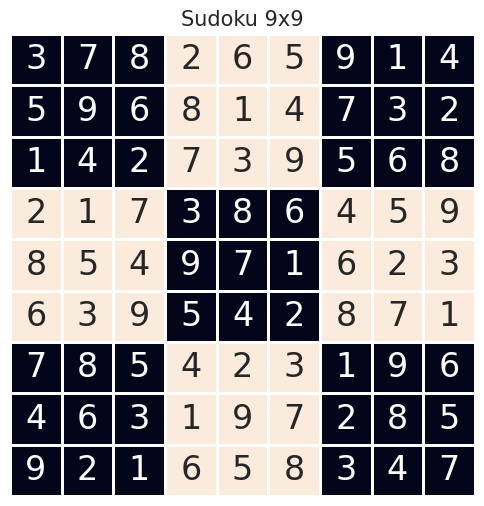

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# matplotlib/seaborn graphical visualisation
def visu_sudoku(grid, figsize=(6,6)):
    N = int(math.sqrt(grid.shape[0]))

    # block-by-block alternation
    bg = np.zeros(grid.shape)
    for i in range(0,9, 3):
        for j in range(0,9, 3):
            if (i+j) % 2:
                bg[i:i+3, j:j+3] = 1

    # the figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.set(font_scale=2)
    sns.heatmap(bg, annot=grid,
                cbar=False, linewidths=1, xticklabels=False, yticklabels=False)

    plt.title(f"Sudoku {grid.shape[0]}x{grid.shape[1]}", fontsize=15)
    plt.show()


visu_sudoku(puzzle.value())

More examples can be found here: https://github.com/CPMpy/cpmpy/tree/master/examples

Have fun!